<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

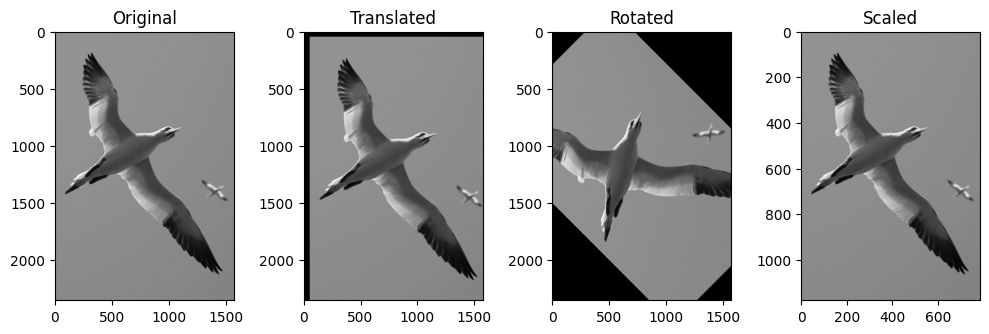

In [5]:
# 1: Image Formation

# ● Objective: Understand how geometric transformations affect images.
# ● Instructions:
# 1. Write a function to perform translation, rotation, and scaling on an
# image without using any library functions.
# 2. Use a sample image and apply each transformation.
# 3. Display the original and transformed images side by side.

import numpy as np
import matplotlib.pyplot as plt
import cv2

def translate(image, tx, ty):
    rows, cols = image.shape[:2]  # Get the correct shape for color images too
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image

def rotate(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

def scale(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

# Assuming 'example.jpg' is in the current directory or accessible path
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)  # Explicitly load in grayscale

# Apply transformations
translated_image = translate(image, 50, 50)
rotated_image = rotate(image, 45)
scaled_image = scale(image, 0.5, 0.5)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(141), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(translated_image, cmap='gray'), plt.title('Translated')
plt.subplot(143), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated')
plt.subplot(144), plt.imshow(scaled_image, cmap='gray'), plt.title('Scaled')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

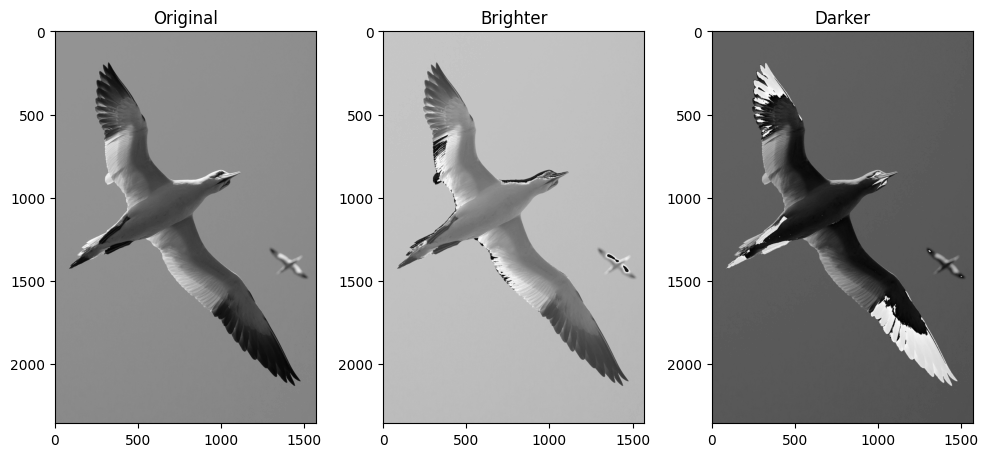

In [9]:
# 2: Photometric Models

# ● Objective: Understand how lighting conditions affect pixel intensities.
# ● Instructions:
# 1. Write a function to simulate different lighting conditions (e.g.,
# increase brightness, decrease brightness).
# 2. Apply these changes to a sample image.
# 3. Display the original and altered images.

import cv2
import numpy as np
import matplotlib.pyplot as plt

def increase_brightness(image, value):
    # Ensure values are within 0-255 range
    bright_image = np.clip(image + value, 0, 255).astype(np.uint8)
    return bright_image

def decrease_brightness(image, value):
    # Ensure values are within 0-255 range
    dark_image = np.clip(image - value, 0, 255).astype(np.uint8)
    return dark_image

# Load the sample image (make sure 'example.jpg' is accessible)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Apply lighting transformations
brighter_image = increase_brightness(image, 50)
darker_image = decrease_brightness(image, 50)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(brighter_image, cmap='gray'), plt.title('Brighter')
plt.subplot(133), plt.imshow(darker_image, cmap='gray'), plt.title('Darker')
plt.tight_layout()
plt.show()

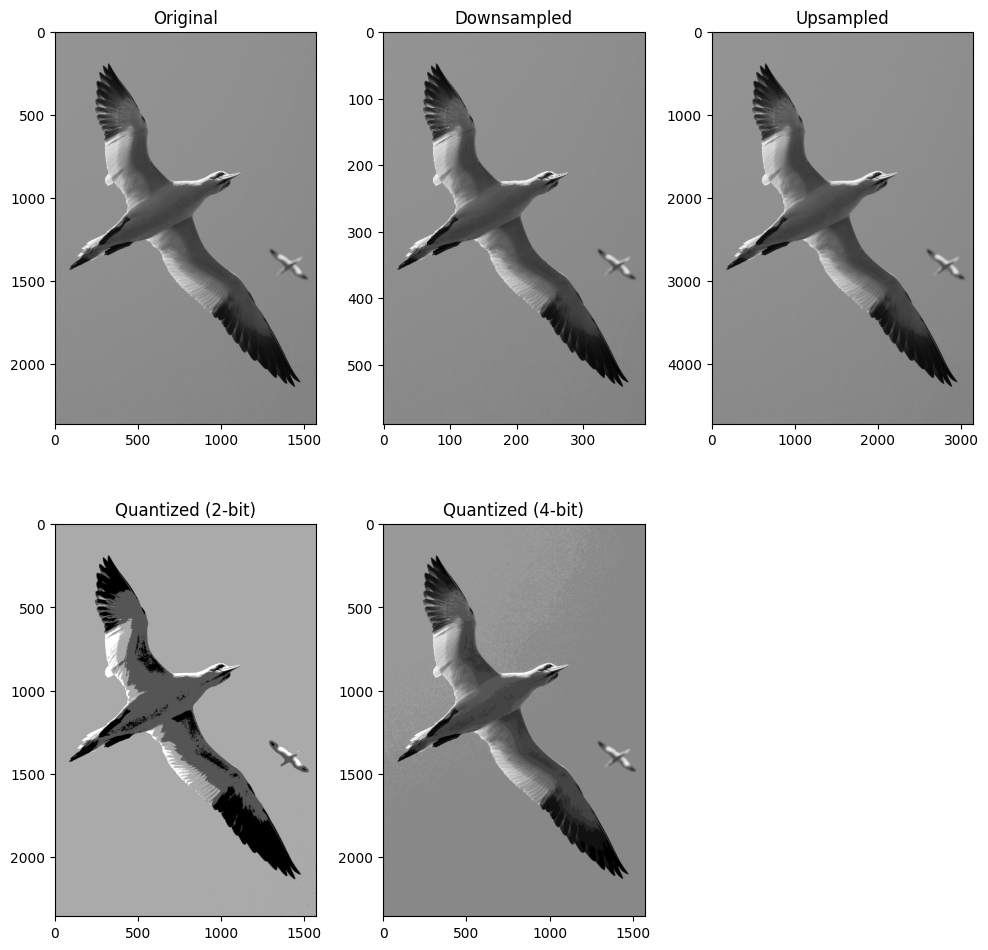

In [15]:
# 3: Sampling and Quantization

# ● Objective: Understand the effects of sampling and quantization on
# image quality.
# ● Instructions:
# 1. Write a function to downsample and upsample an image.
# 2. Write a function to quantize an image to different levels (e.g., 2-bit,
# 4-bit).

# 3. Apply these functions to a sample image.
# 4. Display the results on image quality.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to downsample an image (reduce resolution)
def downsample(image, factor):
    height, width = image.shape
    new_height, new_width = height // factor, width // factor
    downsampled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return downsampled_image

# Function to upsample an image (increase resolution)
def upsample(image, factor):
    height, width = image.shape
    new_height, new_width = height * factor, width * factor
    upsampled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return upsampled_image

# Function to quantize an image to n-bit
def quantize(image, n_bits):
    # Create the quantization factor
    quantization_level = 2 ** n_bits
    quantized_image = np.floor(image / (256 / quantization_level)) * (256 / quantization_level)
    return quantized_image.astype(np.uint8)

# Load the sample image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the transformations
downsampled_image = downsample(image, 4)
upsampled_image = upsample(image, 2)
quantized_image_2bit = quantize(image, 2)
quantized_image_4bit = quantize(image, 4)

# Now display the results
plt.figure(figsize=(10, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(downsampled_image, cmap='gray'), plt.title('Downsampled')
plt.subplot(233), plt.imshow(upsampled_image, cmap='gray'), plt.title('Upsampled')
plt.subplot(234), plt.imshow(quantized_image_2bit, cmap='gray'), plt.title('Quantized (2-bit)')
plt.subplot(235), plt.imshow(quantized_image_4bit, cmap='gray'), plt.title('Quantized (4-bit)')
plt.tight_layout()
plt.show()

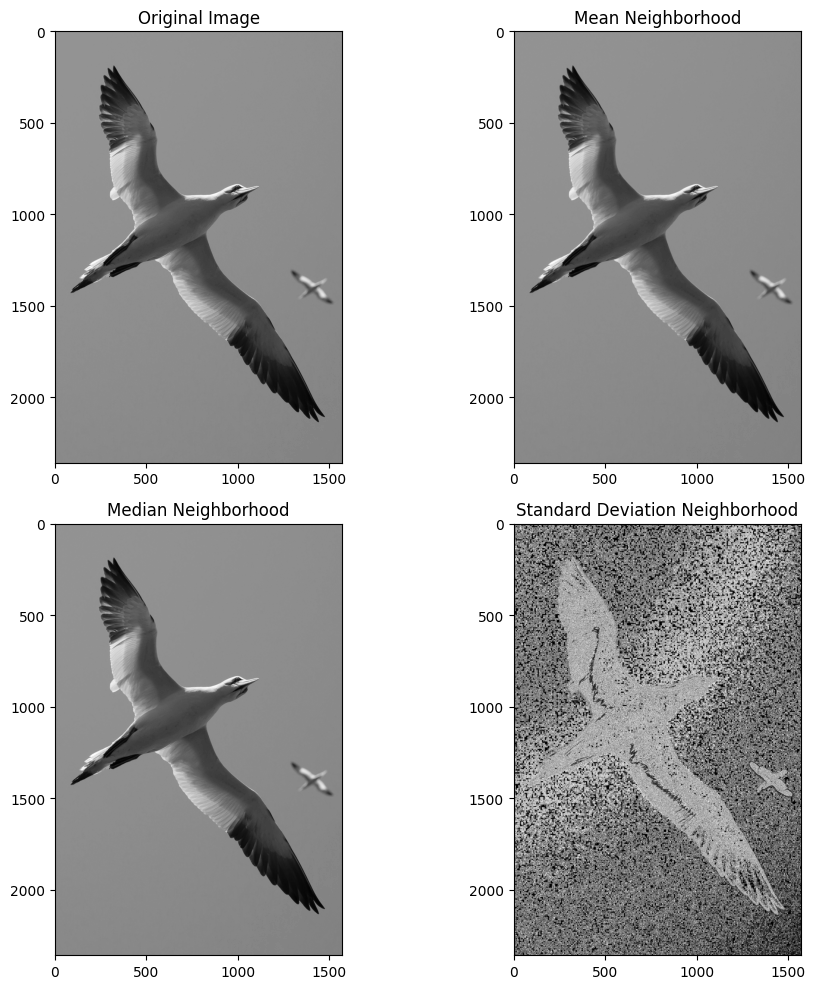

In [1]:
# 4: Image Definition and Neighbourhood Metrics

# ● Objective: Understand how images are defined and represented, and
# explore neighborhood metrics.
# ● Instructions:
# 1. Define an image as a 2D matrix and implement functions to
# compute basic neighborhood metrics (e.g., mean, median,
# standard deviation within a neighborhood).
# 2. Apply these metrics to a sample image.
# 3. Display the results and discuss their significance.


import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load the image in grayscale
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Compute neighborhood metrics
mean_image = cv2.blur(image, (3, 3))  # Mean using cv2.blur
median_image = median_filter(image, size=3)  # Median using filter

# Faster standard deviation calculation
mean_image_sq = cv2.blur(image**2, (3, 3))  # Mean of squared values
std_image = np.sqrt(mean_image_sq - mean_image**2)  # Std Dev

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(mean_image, cmap='gray'), plt.title('Mean Neighborhood')
plt.subplot(223), plt.imshow(median_image, cmap='gray'), plt.title('Median Neighborhood')
plt.subplot(224), plt.imshow(std_image, cmap='gray'), plt.title('Standard Deviation Neighborhood')
plt.tight_layout()
plt.show()